Rifky Azhar Prayoga
211351124
Pagi A

#import Datasets kaggle

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [6]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rifkyazhar","key":"cfaa7775cfc3c67ea6f3e614d1abcd16"}'}

In [7]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [9]:
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009


  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 45.1MB/s]


In [10]:
!unzip red-wine-quality-cortez-et-al-2009.zip -d redwine
!ls redwine

Archive:  red-wine-quality-cortez-et-al-2009.zip
  inflating: redwine/winequality-red.csv  
winequality-red.csv


#Data Discovery

In [57]:
X = df

In [13]:
df = pd.read_csv("/content/redwine/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
df.head().style.background_gradient(cmap =sns.cubehelix_palette(as_cmap=True))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [63]:
X = df.iloc[:,0:11]
y = df['quality']

#stadardize data
X_scaled = StandardScaler().fit_transform(X)

In [16]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.9964,3.15,0.92,11.7,8
570,11.5,0.35,0.49,3.3,0.070,10.0,37.0,1.0003,3.32,0.91,11.0,6
143,6.3,0.39,0.08,1.7,0.066,3.0,20.0,0.9954,3.34,0.58,9.4,5
70,7.7,0.63,0.08,1.9,0.076,15.0,27.0,0.9967,3.32,0.54,9.5,6
657,12.0,0.50,0.59,1.4,0.073,23.0,42.0,0.9980,2.92,0.68,10.5,7


In [17]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [20]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [21]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [22]:
df.shape

(1599, 12)

In [25]:
df['density'].unique()

array([0.9978 , 0.9968 , 0.997  , 0.998  , 0.9964 , 0.9946 , 0.9959 ,
       0.9943 , 0.9974 , 0.9986 , 0.9969 , 0.9982 , 0.9966 , 0.9955 ,
       0.9962 , 0.9972 , 0.9958 , 0.9993 , 0.9957 , 0.9975 , 0.994  ,
       0.9976 , 0.9934 , 0.9954 , 0.9971 , 0.9956 , 0.9983 , 0.9967 ,
       0.9961 , 0.9984 , 0.9938 , 0.9932 , 0.9965 , 0.9963 , 0.996  ,
       0.9973 , 0.9988 , 0.9937 , 0.9952 , 0.9916 , 0.9944 , 0.9996 ,
       0.995  , 0.9981 , 0.9953 , 0.9924 , 0.9948 , 0.99695, 0.99545,
       0.99615, 0.9994 , 0.99625, 0.99585, 0.99685, 0.99655, 0.99525,
       0.99815, 0.99745, 0.9927 , 0.99675, 0.99925, 0.99565, 1.00005,
       0.9985 , 0.99965, 0.99575, 0.9999 , 1.00025, 0.9987 , 0.99935,
       0.99735, 0.99915, 0.9991 , 1.00015, 0.9997 , 1.001  , 0.9979 ,
       1.0014 , 1.0001 , 0.99855, 0.99845, 0.9998 , 0.99645, 0.99865,
       0.9989 , 0.99975, 0.999  , 1.0015 , 1.0002 , 0.9992 , 1.0008 ,
       1.     , 1.0006 , 1.0004 , 1.0018 , 0.9912 , 1.0022 , 1.0003 ,
       0.9949 , 0.99

In [26]:
df['residual sugar'].unique()

array([ 1.9 ,  2.6 ,  2.3 ,  1.8 ,  1.6 ,  1.2 ,  2.  ,  6.1 ,  3.8 ,
        3.9 ,  1.7 ,  4.4 ,  2.4 ,  1.4 ,  2.5 , 10.7 ,  5.5 ,  2.1 ,
        1.5 ,  5.9 ,  2.8 ,  2.2 ,  3.  ,  3.4 ,  5.1 ,  4.65,  1.3 ,
        7.3 ,  7.2 ,  2.9 ,  2.7 ,  5.6 ,  3.1 ,  3.2 ,  3.3 ,  3.6 ,
        4.  ,  7.  ,  6.4 ,  3.5 , 11.  ,  3.65,  4.5 ,  4.8 ,  2.95,
        5.8 ,  6.2 ,  4.2 ,  7.9 ,  3.7 ,  6.7 ,  6.6 ,  2.15,  5.2 ,
        2.55, 15.5 ,  4.1 ,  8.3 ,  6.55,  4.6 ,  4.3 ,  5.15,  6.3 ,
        6.  ,  8.6 ,  7.5 ,  2.25,  4.25,  2.85,  3.45,  2.35,  2.65,
        9.  ,  8.8 ,  5.  ,  1.65,  2.05,  0.9 ,  8.9 ,  8.1 ,  4.7 ,
        1.75,  7.8 , 12.9 , 13.4 ,  5.4 , 15.4 ,  3.75, 13.8 ,  5.7 ,
       13.9 ])

In [27]:
df.head().style.background_gradient(cmap = 'RdPu').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

<ipython-input-27-9b1d8a06f374>:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df.head().style.background_gradient(cmap = 'RdPu').set_properties(**{'font-family': 'Segoe UI'}).hide_index()


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5


#Modeling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

Text(4, 950000, 'possible elbow point')

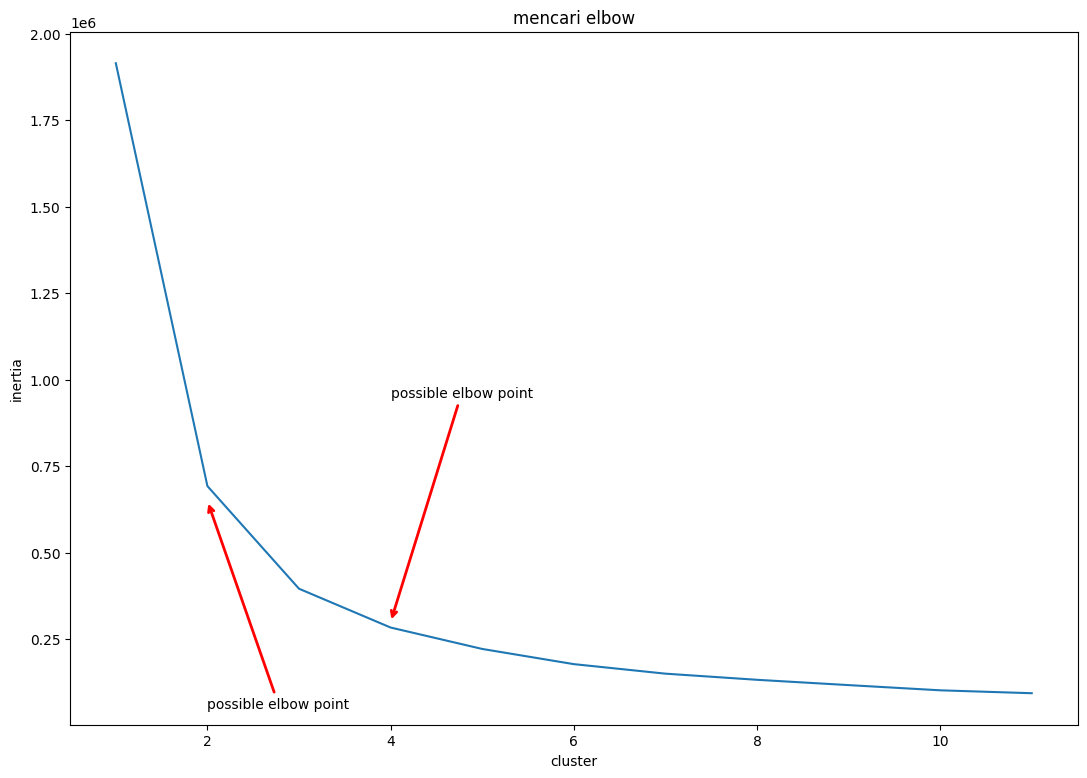

In [35]:
cluster=[]
for i in range(1,12):
    km =KMeans(n_clusters=i).fit(df)
    cluster.append(km.inertia_)

fig, ax = plt.subplots(figsize=(13,9))
sns.lineplot(x=list(range(1,12)), y=cluster, ax=ax)
ax.set_title('mencari elbow')
ax.set_xlabel('cluster')
ax.set_ylabel('inertia')



#panah elbow
ax.annotate('possible elbow point', xy=(2, 650000), xytext=(2, 50000),xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2))

#panah elbow
ax.annotate('possible elbow point', xy=(4, 300000), xytext=(4, 950000),xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2))

In [36]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
clusters = kmeans.fit_predict(df)

#Visual Modeling

In [65]:
fig = plt.figure(figsize=(20, 15))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=40)

ax.scatter(X_scaled[:,0], X_scaled[:,3], X_scaled[:,10],c=y, edgecolor='k')
ax.set_xlabel('Acidity')
ax.set_ylabel('Sugar')
ax.set_zlabel('Alcohol')
ax.set_title('K=2: Acidity, Sugar, Alcohol', size=22)


Text(0.5, 0.92, 'K=2: Acidity, Sugar, Alcohol')

<Figure size 2000x1500 with 0 Axes>

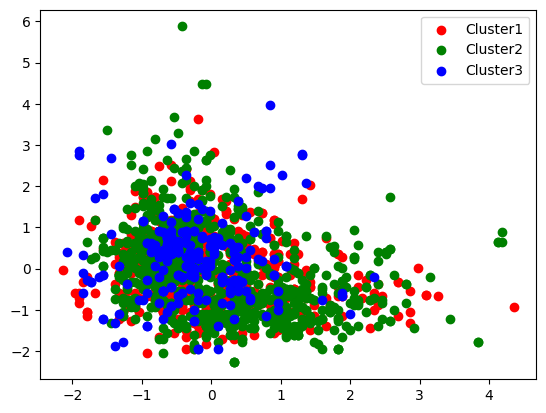

In [66]:
colors = 'rgbkcmy'
for i in np.unique(clusters):
    plt.scatter(X_scaled[clusters==i,0],
               X_scaled[clusters==i,1],
               color=colors[i], label='Cluster' + str(i+1))
plt.legend()

In [67]:
import pickle

filename = "red.sav"
pickle.dump(kmeans,open(filename,'wb'))

In [69]:
class KMeans:
    def _init_(self, k=3, max_iter=100):
        self.k = k
        self.max_iter = max_iter

    def fit(self, X):
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iter):
            clusters = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, clusters)

            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        return clusters

    def _initialize_centroids(self, X):
        indices = np.random.choice(len(X), self.k, replace=False)
        return X[indices]

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=-1)
        return np.argmin(distances, axis=-1)

    def _update_centroids(self, X, clusters):
        new_centroids = np.empty_like(self.centroids)

        for i in range(self.k):
            new_centroids[i] = np.mean(X[clusters == i], axis=0)

        return new_centroids

